# 2.1 预测饱和增长

默认情况下， Prophet 使用线性模型进行预测。当预测增长情况时，通常会存在可到达的最大极限值，例如：总市场规模、总人口数等等。这被称做**承载能力**（carrying capacity），那么预测时就应当在接近该值时趋于饱和。

In [1]:
import pandas as pd
from fbprophet import Prophet
df = pd.read_csv('examples/example_wp_log_R.csv')

新建一列 cap 来指定承载能力的大小。本实例中假设取某个特定的值，**通常情况下这个值应当通过市场规模的数据或专业知识来决定**。

In [2]:
df['cap'] = 8.5

**值得注意的是数据框的每行都必须指定 cap 的值，但并非需要是恒定值**。如果市场规模在不断地增长，那么 cap 也可以是不断增长的序列。

如之前教程所述来拟合模型，并且通过一个新增的参数来指定采用 logistic 增长：

In [3]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\PC-00001\Miniconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



如前所述，我们可以创建一个数据框来预测未来值，不过这里要指定未来的承载能力。我们将未来的承载能力设定得和历史数据一样，并且预测未来 3 年的数据。

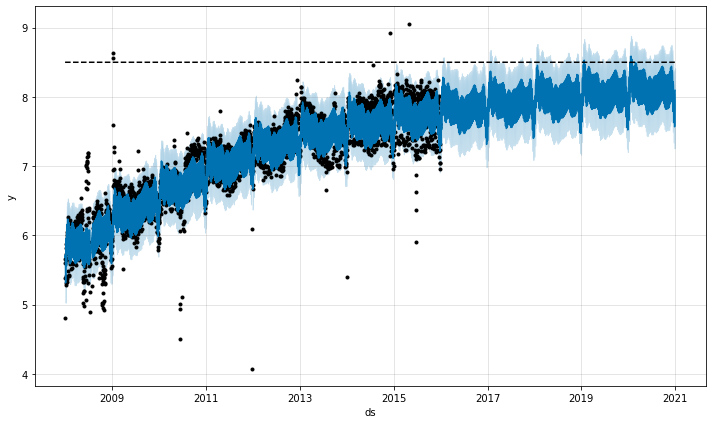

In [4]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
pd.plotting.register_matplotlib_converters()
fugure1 = m.plot(fcst)

# 2.2 预测饱和减少
logistic增长模型还可以处理饱和最小值，方法与指定最大值的列的方式相同:

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


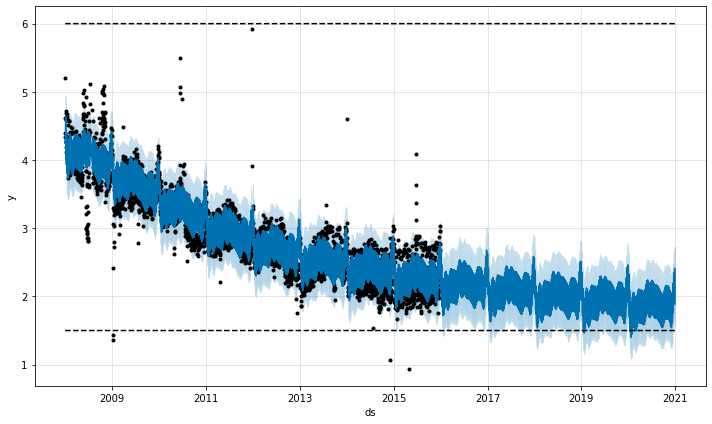

In [5]:
# Python
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
pd.plotting.register_matplotlib_converters()
figure2 = m.plot(fcst)